<h3 style="text-align: center;">Lab 07: Raster</h3>

- This lab covers the topics about essential GIS raster operations using Python's rasterio, geopandas and matplotlib libraries.  

- There are three questions in total. Please provide your code answers directly below each question.

- Make sure to run all cells so that the answers are stored. Once completed, export your .ipynb file as either **HTML** or **PDF**, **ensuring that all answers are included**. Submit the HTML or PDF file to Canvas by **midnight (11:29 PM) on October 27**.

- This lab is worth a total of **65 points** and contributes **6.5%** toward the final grade.

## 1. Reading and Exploring Raster data (30pts)
- Open the single-band DEM using rasterio
- Retrieve the raster metadata to answer questions below

In [2]:
import geopandas as gpd
import rasterio
import os
import rasterio.plot

In [3]:
os.getcwd()
dem_path = os.path.join(os.getcwd(),  "data\dem\dem_tiff.tif")

dem = rasterio.open(dem_path)
print(dem)

<open DatasetReader name='e:\Clark\Spring2025\Github_Courses\geog386_PythonProgramming\docs\Labs\Lab_06_gpd_raster\data\dem\dem_tiff.tif' mode='r'>


In [4]:
dem.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028234663852886e+38,
 'width': 12347,
 'height': 12649,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["NAD83 / UTM zone 12N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-111],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26912"]]'),
 'transform': Affine(8.62915885870463, 0.0, 487521.82208993303,
        0.0, -8.62915885870463, 4995725.430409501)}

### 1.1 What is the resolution? (5 pts)


In [5]:
dem.res
print('The resolution is 10 meter')

The resolution is 10 meter


### 1.2 How many bands in the raster? (5 pts)

In [6]:
dem.count

1

### 1.3 What is the data type? (5 pts)

In [7]:
dem.driver

'GTiff'

### 1.4 what is the CRS? (5 pts)

In [8]:
dem.crs

CRS.from_wkt('PROJCS["NAD83 / UTM zone 12N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-111],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26912"]]')

### 1.5 What is the pixel data type? (5 pts)

In [9]:
dem.dtypes

('float32',)

## 2. Visualizing Raster (5 pts)
- Visualize the DEM using a custom colormap (e.g., cmap = "terrain")

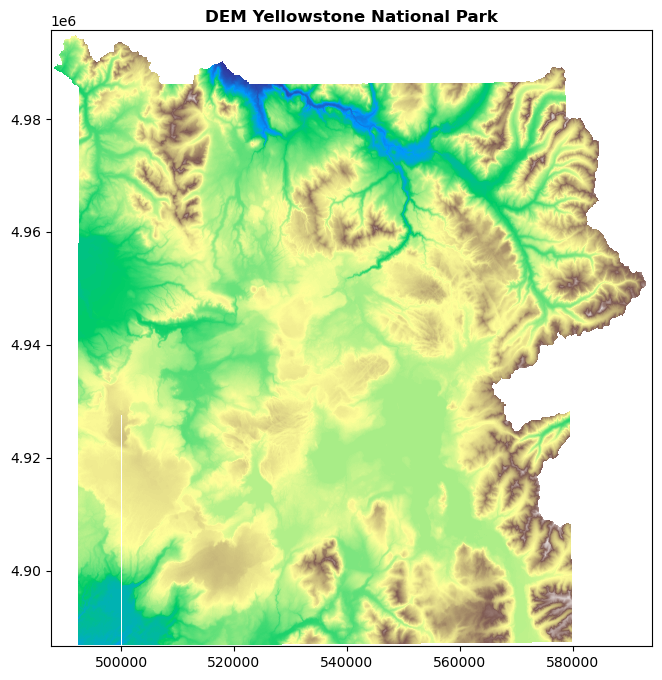

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(dem, cmap="terrain", ax=ax, title="DEM Yellowstone National Park")
plt.show()

## 3. Clip Raster and visualiza clipped raster (35 pts)
- Clip a subset of DEM using square.shp
- Visualize the clipeed raster

In [11]:
import fiona
import rasterio.mask

vector_path = os.path.join(os.getcwd(),  "data\shapefile\square.shp")
with fiona.open(vector_path, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
    
out_image, out_transform = rasterio.mask.mask(dem, shapes, crop=True)

out_meta = dem.meta

out_image.shape

out_meta.update(
    {
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform,
    }
)

with rasterio.open('dem_clip.tif', "w", **out_meta) as dst:
    dst.write(out_image)
    


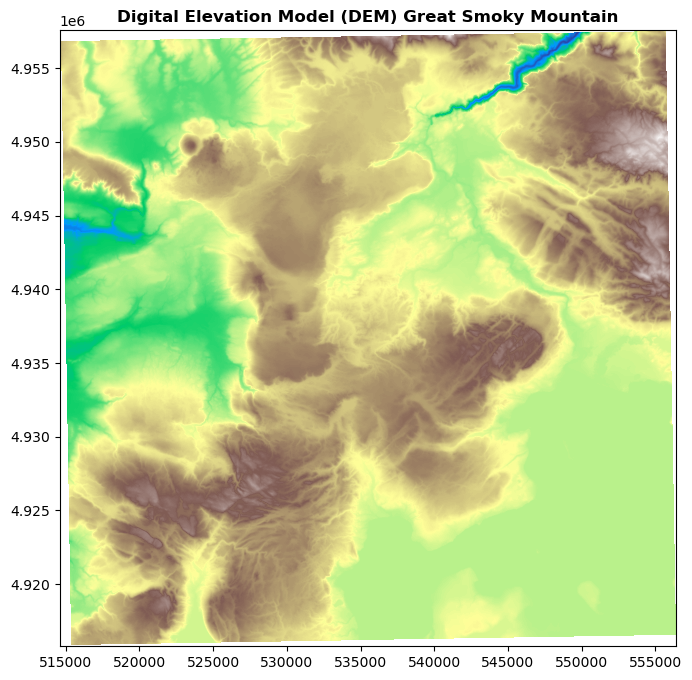

In [12]:
clip_dem_path = os.path.join(os.getcwd(), 'dem_clip.tif')
clip_dem = rasterio.open(clip_dem_path)

fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(clip_dem, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM) Great Smoky Mountain")
plt.show()